<a href="https://colab.research.google.com/github/aarav911/Brain_Tumor_Segmentation_BCP/blob/main/nibabel_basics_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving zstat1.nii.gz to zstat1.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [6]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (64, 64, 21)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

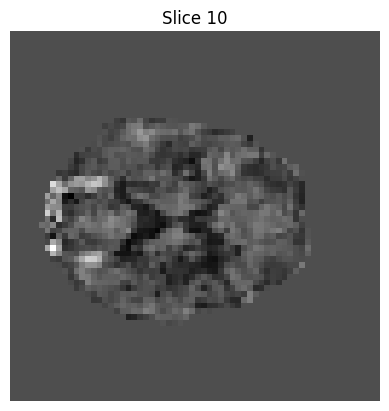

In [7]:
slice_index = mri.shape[2] // 2 # just a random index
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [8]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

21

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

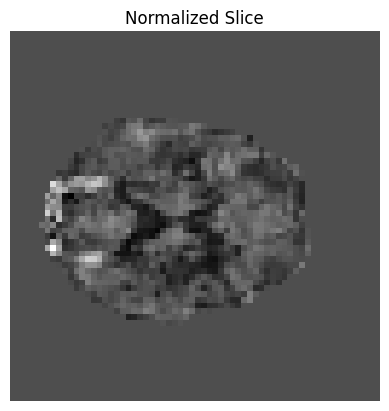

In [9]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

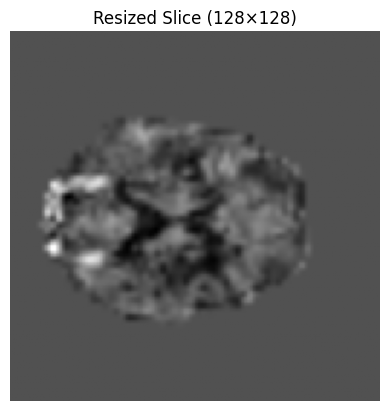

In [10]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [15]:
import os
from google.colab import files

uploaded_new = files.upload()
original_file_path = list(uploaded_new.keys())[0]

#
new_file_name = "uploaded_mri.nii.gz"

# because of the earlier file
os.rename(original_file_path, new_file_name)

# Load the MRI data using the clean filename
new_mri = nib.load(new_file_name).get_fdata()
print('New MRI Shape:', new_mri.shape)

IndexError: list index out of range

Plotting slices: [0, 5, 10, 15, 20]


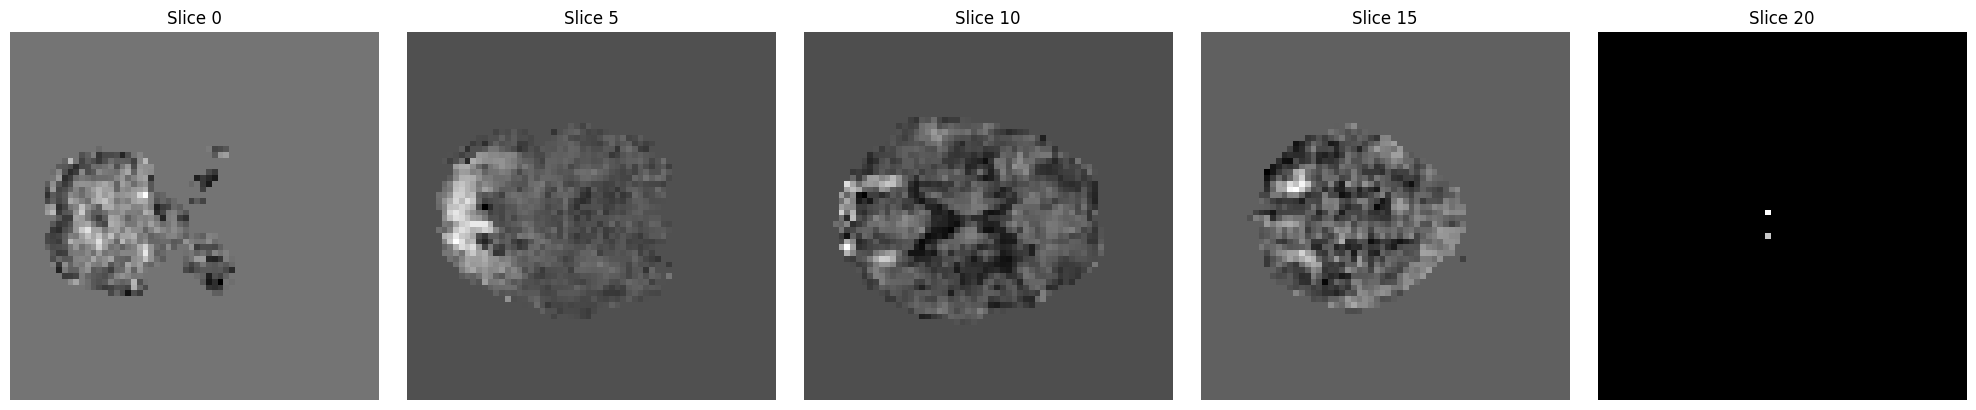

In [13]:
import math

def plot_slices(volume, indices):

    num_slices = len(indices)
    if num_slices == 0:
        print("No slices to plot.")
        return
    #the problem is that some files may have less than 5 slices
    # Determine optimal grid for subplots
    if num_slices == 1:
        rows = 1
        cols = 1
    elif num_slices <= 4:
        rows = 1
        cols = num_slices
    else:
        rows = math.ceil(num_slices / 5) # Aim for max 5 columns
        cols = min(num_slices, 5)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten() # Flatten in case of multiple rows

    for i, slice_idx in enumerate(indices):
        if slice_idx < 0 or slice_idx >= volume.shape[2]:
            print(f"Warning: Slice index {slice_idx} is out of bounds for volume with depth {volume.shape[2]}.")
            continue

        ax = axes[i]
        ax.imshow(volume[:, :, slice_idx], cmap='gray')
        ax.set_title(f'Slice {slice_idx}')
        ax.axis('off')

    # Turn off unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage with the newly loaded MRI volume (new_mri)
# Ensure new_mri is loaded and available from previous steps
if 'new_mri' in locals():
    # Generate 5 sample slice indices. Adjust if new_mri has fewer than 5 slices.
    sample_indices = np.linspace(0, new_mri.shape[2] - 1, 5, dtype=int)
    print(f"Plotting slices: {sample_indices.tolist()}")
    plot_slices(new_mri, sample_indices.tolist())
else:
    print("Error: 'new_mri' not found. Please ensure the new MRI file is loaded.")


In [16]:
def normalize_all_slices(volume):

    min_val = np.min(volume)
    max_val = np.max(volume)

    # Avoid division by zero if max_val == min_val
    if max_val == min_val:
        return np.zeros_like(volume)

    normalized_volume = (volume - min_val) / (max_val - min_val)
    return normalized_volume

# Example usage with the newly loaded MRI volume (new_mri)
# Ensure new_mri is loaded and available from previous steps
if 'new_mri' in locals():
    normalized_new_mri = normalize_all_slices(new_mri)
    print(f'Original New MRI Min: {np.min(new_mri):.4f}, Max: {np.max(new_mri):.4f}')
    print(f'Normalized New MRI Min: {np.min(normalized_new_mri):.4f}, Max: {np.max(normalized_new_mri):.4f}')
else:
    print("Error: 'new_mri' not found. Please ensure the new MRI file is loaded.")

Original New MRI Min: -8.7108, Max: 18.5825
Normalized New MRI Min: 0.0000, Max: 1.0000
